<a href="https://colab.research.google.com/github/Nithie-code/Data-Analysis/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project , we develop  a Decision tree model using a banking data to predict whether a customer will churn.(Dataset:Churn_Modelling.csv)

In [27]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import io
from google.colab import files



In [4]:
#upload the data
uploaded= files.upload()



Saving Churn_Modelling.csv to Churn_Modelling.csv


In [28]:
#Read the data
original_data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
original_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# get more info about the data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Examine the Data**

In [30]:
original_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
# Check class balance
original_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
# check the missing values
original_data['Exited'].isna().sum()

0

In [33]:
# Determine average balance of customers who churned
avg_churned_bal = original_data[original_data['Exited']==1]['Balance'].mean()
print("avg_churned_bal: ",avg_churned_bal)

avg_churned_bal:  91108.53933726068


**Feature engineering**

In [16]:
#1. Features Selection :Crreate a new df that drops irrelevant features including RowNumber, CustomerId, Surname, and Gender cols
churn_df = original_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'],axis=1)
churn_df.head(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,44,8,113755.78,2,1,0,149756.71,1
6,822,France,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,29,4,115046.74,4,1,0,119346.88,1
8,501,France,44,4,142051.07,2,0,1,74940.50,0
9,684,France,27,2,134603.88,1,1,1,71725.73,0


In [19]:
#2.Feature transformation: Get dummies for the categorical  feature 'Geography'
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


**Split the data**

In [35]:
# define  the target
y = churn_df['Exited']
#define the X(predictor) variable
X = churn_df.copy()
X = X.drop('Exited',  axis=1)
#Split into two sets(train and test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y, random_state=42)


**Construct the Model**

In [37]:
decision_tree = DecisionTreeClassifier(random_state=0)
#Fit the model
decision_tree.fit(X_train,y_train)
#generate the predictions
pred_tr=decision_tree.predict(X_test)
#Performance metrics
print("Accuracy :","%.3f" % accuracy_score(y_test,pred_tr))
print("Precision :","%.3f" % precision_score(y_test,pred_tr))
print("Recall :","%.3f" % recall_score(y_test,pred_tr))
print("F1 Score :","%.3f" % f1_score(y_test,pred_tr))


Accuracy : 0.790
Precision : 0.486
Recall : 0.503
F1 Score : 0.494


**Baseline Model Analysis**

In [38]:
#1.Confusion Matrix
def conf_matrix_plot(model,x_data,y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data,model_pred,labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
    disp.plot(values_format =' ')
    plt.plot()

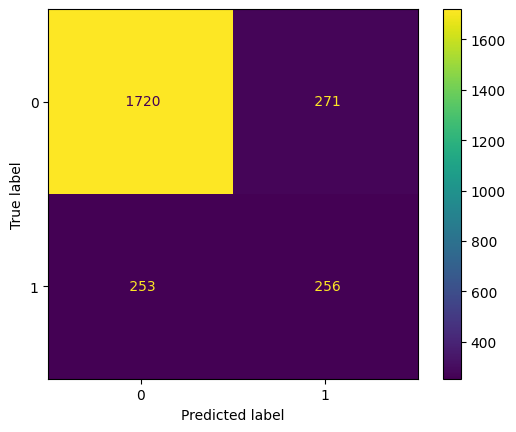

In [41]:
#Generate the confusion matrix
conf_matrix_plot(decision_tree,X_test,y_test)

This confusion matrix depicts that the model correctly predicts many true negatives. This is to be expected, given that the dataset is imbalanced in favor of negatives.

[Text(0.5, 0.875, 'Age <= 42.5\ngini = 0.324\nsamples = 7500\nvalue = [5972, 1528]\nclass = stayed'),
 Text(0.25, 0.625, 'NumOfProducts <= 2.5\ngini = 0.211\nsamples = 5350\nvalue = [4708, 642]\nclass = stayed'),
 Text(0.125, 0.375, 'NumOfProducts <= 1.5\ngini = 0.188\nsamples = 5223\nvalue = [4674, 549]\nclass = stayed'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Balance <= 55948.91\ngini = 0.392\nsamples = 127\nvalue = [34, 93]\nclass = churned'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'IsActiveMember <= 0.5\ngini = 0.485\nsamples = 2150\nvalue = [1264, 886]\nclass = stayed'),
 Text(0.625, 0.375, 'Age <= 50.5\ngini = 0.484\nsamples = 964\nvalue = [396, 568]\nclass = churned'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumOfProducts <= 2.5\ngini = 0.392\nsamples = 1186\nvalue = [868, 318]\nclass = stayed'),
 Text(0.

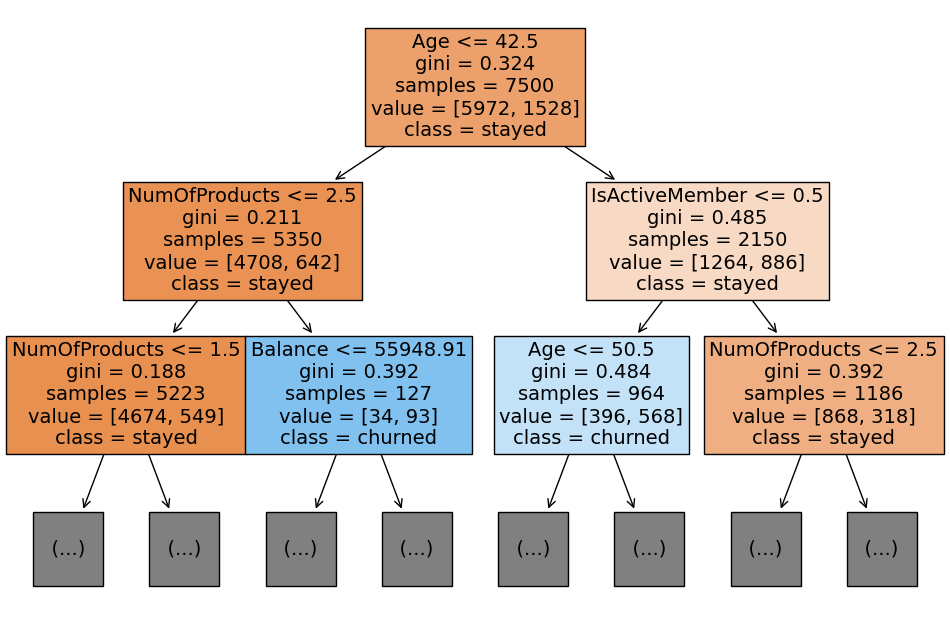

In [45]:
#2 Plot the tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree,max_depth=2,fontsize=14,feature_names=X.columns,class_names={0:'stayed',1:'churned'},filled=True)

**Tuning and validating decision trees**

In [50]:

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
#Cross-validated hyperparameter tuning:Assign  a dictionary of hyperparameters to search over
tree_param = {'max_depth': [4,5,6,7,8,9,10,11,12,13,15,20,25,25,30,35,40,50],'min_samples_leaf':[2,5,10,20,50]}
# Assign a dictionary of scoring metrics to capture
scoring_metr = {'accuracy', 'precision', 'recall', 'f1'}
#initiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state=42)

#instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree,tree_param,scoring=scoring_metr,cv=5,refit='f1')

In [51]:
#fit the model
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20,
                                       25, 25, 30, 35, 40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

In [52]:
# Examine the best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

In [53]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.5607


In [54]:
def make_results(model_name, model_object):


    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )

    return table

In [57]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)
#save the results to csv file
result_table.to_csv("Results.csv")
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.560655,0.469255,0.701608,0.8504
